Project: Investigate a Dataset (TMDb movie dataset)
Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

Introduction
This dataset contains information about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue. We are going to analyse these data according to their budget, revenue, ratings, and their profits.

The questions we are trying to answer are:

Which genres are most popular from year to year?
What kinds of properties are associated with movies that have high revenues?
Which movies are popular year by year?


Questions that can be answered by looking at the datasets are:
Which movie has the highest profit & which has the lowest ?
Which movie has the longest runtime & which has the lowest ?
Which movie had the highest and lowest budget?
Which movie had the highest and lowest revenue?
Which are the most frequent actor involved?

Questions that will be answered based on the 100 rated movies:
What is the highest rated movie?
What is the average budget of the movies?
What is the average revenue of the movies?
What is the average runtime of the movies?
Which are the successfull genres?
Which are the most frequent actor involved?

In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
#from wordcloud import WordCloud

from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Data Wrangeling

In this section, we will see how the data is represented, we will identify, collect, merge (if needed), and pre-process our dataset in preparation for our data analysis and subsequent works. 

Initial Data Investigation
General Properties of the Dataset

In [3]:
#### load the dataset and create their dataframes
#Western Cape commute times dataset

#df = pd.read_csv("commute_times.csv")
#df.head(2)
df = pd.read_csv("tmdb_movies_data.csv")
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#df.isnull().sum()
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The outcome of the code above shows that there are too many null values that we might need to deal with

First of all let's get rid of the columns that we won't use as they won't affect the analysis. I don't think we need : (id, imdb_id , homepage , director , tagline, keywords, overview, production_companies, budget_adj, revenue_adj , vote_count , popularity

In [8]:
#droping the columns
columns_drop=['id','imdb_id','popularity','homepage','director' , 'tagline','vote_count', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj']
df.drop(columns_drop, axis =1 , inplace = True)

In [9]:
df.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/2015,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/2015,7.3,2015


In [10]:
df.shape

(10866, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10866 non-null  int64  
 1   revenue         10866 non-null  int64  
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 764.1+ KB


In [12]:
df.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,1.462570e+07,3.982332e+07,102.070863,5.974922,2001.322658
std,3.091321e+07,1.170035e+08,31.381405,0.935142,12.812941
min,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [13]:
#check missing values

df.isna().sum()
#There are stil a few missing values found, cast and genres variables

budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
dtype: int64

There are 23 missing values in the genres column and 76 in the cast column

Now we will check for duplicated values and null values

In [14]:
duplicates = df[df.duplicated()]

print(duplicates)

        budget  revenue original_title  \
2090  30000000   967000         TEKKEN   

                                                   cast  runtime  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...       92   

                                           genres release_date  vote_average  \
2090  Crime|Drama|Action|Thriller|Science Fiction    3/20/2010           5.0   

      release_year  
2090          2010  


I have only one duplicated value. I'm going to remove one of them and keep the other

In [15]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df[df.duplicated()]

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year


Now we have no duplicated values

In [17]:
df.isnull().sum()

budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
dtype: int64

In [18]:
df[df.genres.isnull()]

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year
424,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,100,NaN,10/29/2015,6.1,2015
620,0,0,All Hallows' Eve 2,NaN,90,NaN,10/6/2015,5.0,2015
997,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,44,NaN,10/3/2014,6.8,2014
1712,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,88,NaN,2/27/2009,7.4,2009
1897,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,76,NaN,2/27/2009,7.0,2009
2370,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,0,NaN,6/5/2010,5.8,2010
2376,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,62,NaN,12/25/2010,7.7,2010
2853,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,110,NaN,2/2/2001,7.2,2001
3279,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,96,NaN,8/13/2008,6.1,2008
4547,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,220,NaN,7/27/2012,8.3,2012


I think the best thing to do with these null values is to remove them. Removing them won't affect the data analysis process

In [19]:
#removing the rows which have the null values
df.dropna(subset = ["genres"], inplace=True)
df[df.genres.isnull()]

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10842 non-null  int64  
 1   revenue         10842 non-null  int64  
 2   original_title  10842 non-null  object 
 3   cast            10767 non-null  object 
 4   runtime         10842 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10842 non-null  object 
 7   vote_average    10842 non-null  float64
 8   release_year    10842 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 847.0+ KB


We will do the same thing for the cast column

In [21]:
df[df.cast.isnull()]


,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year
371,0,0,Sanjay's Super Team,NaN,7,Animation,11/25/2015,6.9,2015
441,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,98,Documentary,10/9/2015,8.2,2015
465,0,0,Bitter Lake,NaN,135,Documentary,1/24/2015,7.8,2015
536,0,0,A Faster Horse,NaN,90,Documentary,10/8/2015,8.0,2015
538,0,0,The Mask You Live In,NaN,88,Documentary,1/1/2015,8.9,2015
...,...,...,...,...,...,...,...,...,...
9677,0,0,Red's Dream,NaN,4,Animation,8/17/1987,6.6,1987
9755,0,0,The Big Shave,NaN,6,Drama,1/1/1968,6.7,1968
10434,200,0,Six Men Getting Sick,NaN,4,Animation,1/1/1967,5.2,1967
10550,0,0,Luxo Jr.,NaN,2,Animation|Family,8/17/1986,7.3,1986


In [22]:
#droping the NaN's
df.dropna(subset=['cast'],inplace=True)
df[df.cast.isnull()]

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year


In [23]:
df.query('runtime<=0')


,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year
92,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,0,Fantasy|Action|Adventure,12/19/2015,5.4,2015
334,0,0,Ronaldo,Cristiano Ronaldo,0,Documentary,11/9/2015,6.5,2015
410,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,0,Horror,1/1/2015,5.6,2015
445,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,0,Horror,10/9/2015,5.0,2015
486,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,0,TV Movie|Drama,4/5/2015,5.4,2015
595,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,0,Horror,1/1/2015,4.6,2015
616,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,0,Drama|Comedy,11/10/2015,6.6,2015
1241,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,0,Romance|Music|Comedy,1/1/2014,5.7,2014
1289,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,0,Thriller|Horror|Mystery,10/20/2014,3.4,2014
1293,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,0,Documentary|Drama|Music,10/30/2014,6.0,2014


I'm going to drop all the rows having zero or less as their runtime

In [24]:
df.drop(df[df['runtime']<= 0].index, inplace = True)
df.query('runtime<=0')

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year


Let's have a look at the runtime column

In [25]:
df.runtime

0        124
1        120
2        119
3        136
4        137
        ... 
10861     95
10862    176
10863     94
10864     80
10865     74
Name: runtime, Length: 10737, dtype: int64

In [26]:
#using lambda to convert the time into more familiar formula
df.runtime = df.runtime.apply(lambda x: '{:02d}:{:02d}'.format(*divmod(x, 60)))
df.runtime

0        02:04
1        02:00
2        01:59
3        02:16
4        02:17
         ...  
10861    01:35
10862    02:56
10863    01:34
10864    01:20
10865    01:14
Name: runtime, Length: 10737, dtype: object

Now let's convert the release date into more proper formula

In [27]:
df.release_date = pd.to_datetime(df['release_date'])
df.release_date.head(5)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

I will just add a profits column for the data set

In [28]:
#profit = revenue - budget
df['profit']=df.revenue-df.budget
df.profit.head(10)

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
5     397950503
6     285603537
7     487380321
8    1082730962
9     678708609
Name: profit, dtype: int64

In [29]:
df.head(5)

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_average,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,02:04,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,02:00,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,01:59,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,02:16,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,02:17,Action|Crime|Thriller,2015-04-01,7.3,2015,1316249360


In [30]:
#last checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10737 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          10737 non-null  int64         
 1   revenue         10737 non-null  int64         
 2   original_title  10737 non-null  object        
 3   cast            10737 non-null  object        
 4   runtime         10737 non-null  object        
 5   genres          10737 non-null  object        
 6   release_date    10737 non-null  datetime64[ns]
 7   vote_average    10737 non-null  float64       
 8   release_year    10737 non-null  int64         
 9   profit          10737 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 922.7+ KB


In [31]:
df.shape

(10737, 10)

Our final dataset after cleaning have 10737 rows and 10 columns

# Exploratory Data Analysis
After cleaning our data, its time to answer the research questions we had posed earlier using statistics and visualizations.

Research Question 1.1 
Which movie has the highest profit and which has the lowest ?

We will get the highest profit by sorting the profit descendingly and the opposite to get the lowest

In [32]:
#getting the highest profit
df_HighestSorted_profit=df.sort_values(by='profit' , ascending = False)
df_HighestSorted_profit[['original_title','profit']].head(1)

,original_title,profit
1386,Avatar,2544505847


Avatar is on top of the profits with 2,544,505,847 Dollars

In [33]:
#getting the lowest profit
df_LowSorted_profit=df.sort_values(by='profit' , ascending = True)
df_LowSorted_profit[['original_title','profit']].head(1)

,original_title,profit
2244,The Warrior's Way,-413912431


The Warrior's Way is the lowest profit with total loss of -413,912,431 Dollas.

Research Question 1.2 
Which movie has the longest runtime and which has the shortest ?

The same process will happen here

In [34]:
#getting the longest runtime
df_Longest=df.sort_values(by='runtime',ascending = False)
df_Longest[['original_title','runtime']].head(1)

,original_title,runtime
3894,The Story of Film: An Odyssey,15:00


The movie that has the longest runtime is The Story of Film: An Odyssey with 15 hours runtime !

In [35]:
#getting the lowest runtime
df_lowest=df.sort_values(by='runtime',ascending = True)
df_lowest[['original_title','runtime']].head(1)

,original_title,runtime
1112,Batman: Strange Days,00:03


The movie that has the shortest runtime is Batman: Strange Days with only 3 minutes runtime !

Research Question 1.3 
Which movie had the highest and lowest budget?

Again, the same process

In [36]:
#getting the highest budget
df_HighestBudget=df.sort_values(by='budget',ascending = False)
df_HighestBudget[['original_title','budget']].head(1)

,original_title,budget
2244,The Warrior's Way,425000000


The Warrior's Way lead the way with 425,000,000 Dollas.

In [37]:
#getting the lowest budget
df_lowestBudget=df.sort_values(by='budget',ascending = True)
df_lowestBudget[['original_title','budget']].head(1)

,original_title,budget
3817,Salvando al Soldado Perez,0


Salvando al Soldado Perez has the lowest budget with a value of zero.

Now let's visualize the relation between budget and profit

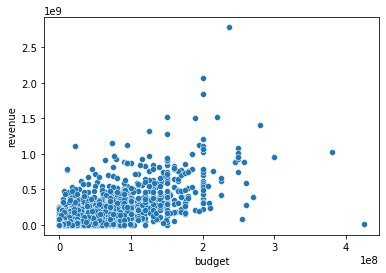

In [38]:
sns.scatterplot(data=df, x="budget", y="revenue");

As we can see the more the movie's budget is, the more profit achieved. This shows a positive correlation between budget and revenue.

Research Question 1.4 
Which movie had the highest and lowest revenue?

In [39]:
#getting the highest revenue
df_Highestrevenue=df.sort_values(by='revenue',ascending = False)
df_Highestrevenue[['original_title','revenue']].head(1)

,original_title,revenue
1386,Avatar,2781505847


Avatar has the highest revenue of 2,781,505,847 Dollars as total revenue.

In [40]:
#getting the lowest budget
df_lowestrevenue=df.sort_values(by='revenue',ascending = True)
df_lowestrevenue[['original_title','revenue']].head(1)

,original_title,revenue
10865,Manos: The Hands of Fate,0


Manos: The Hands of Fate has 0 as total revenue.

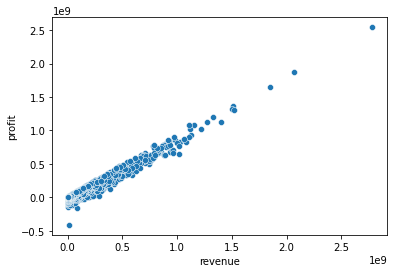

In [41]:
sns.scatterplot(data=df, x="revenue", y="profit");

I found that the relation between revenue and profit is linear

The graph between budget and revenue is like the following :

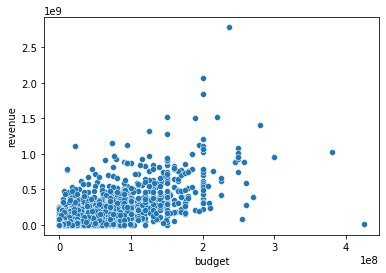

In [42]:
sns.scatterplot(data=df, x="budget", y="revenue");

The relation between revenue and profit is directly proportional so when the budget increases the revenue increases as well

Research Question 1.5
Who are the most frequent actor involved?

In [43]:
#Getting the most frequent actor
cast_count = pd.Series(df['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Liam Neeson           48
Susan Sarandon        48
Julianne Moore        47
Alec Baldwin          47
Gene Hackman          46
Johnny Depp           46
Christopher Walken    46
Tom Hanks             46
Willem Dafoe          45
Dennis Quaid          45
Meryl Streep          44
dtype: int64

Robert De Niro lead the way here.

Displaying this on a plot

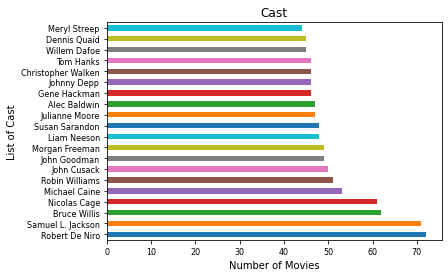

In [44]:
#for the color variety
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
# Initialize the plot
diagram = cast_count.head(20).plot.barh(fontsize = 8,color=colors)
# Set a title
diagram.set(title = 'Cast')
# x-label and y-label
diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of Cast')
# Show the plot
plt.show()

Research Question 2 

Questions that will be answered based on the 100 rated movies

Before analyzing the top 100 movies we should get a dataframe for the movies

In [45]:
df100R=df.sort_values(by='vote_average',ascending=False)
df100R=df100R[['original_title','vote_average']].head(100)
#dataframe that includes the top 100 movies
df100R.head(10)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
1200,Black Mirror: White Christmas,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3690,The Art of Flight,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
3224,John Mayer: Where the Light Is Live in Los Ang...,8.5
8411,Queen - Rock Montreal,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5
609,The Jinx: The Life and Deaths of Robert Durst,8.4


Research Question 2.1 
What is the highest rated movie?

In [46]:
df100R.head(1)

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2


The Story of Film: An Odyssey is the highest rated movie.

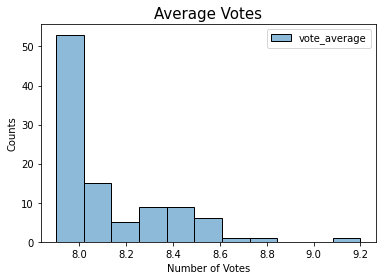

In [47]:
sns.histplot(data=df100R);
plt.xlabel("Number of Votes", size=10)
plt.ylabel("Counts", size=10)
plt.title("Average Votes", size=15);

Over 50% of the top 100 movies are rated with 8.0

Let's see some visualization of the top 100 movies

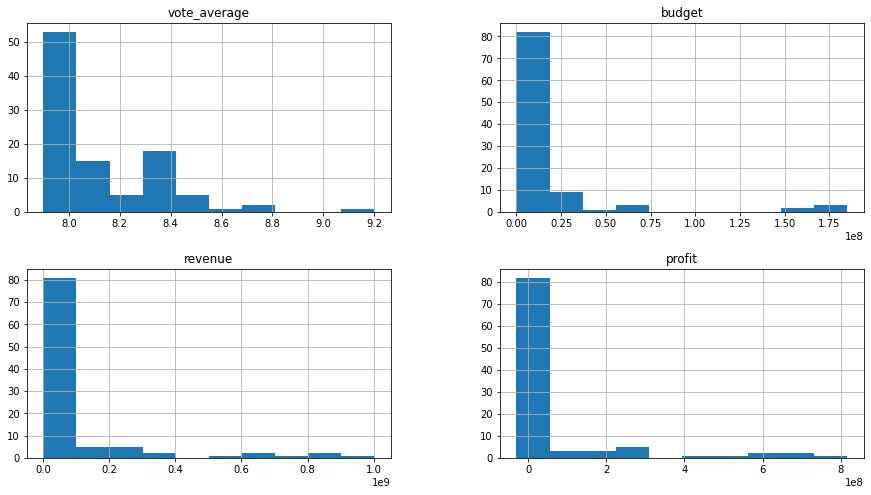

In [48]:
#creating a dataframe first
df100=df.sort_values(by='vote_average',ascending=False)
df100=df100[['original_title','vote_average','budget','revenue','profit','genres','cast']].head(100)
#visualizing the data
df100.hist(figsize=(15,8));

Seems here that most of the 8.0 rated films did not spend too much compared to the higher rated movies

Research Question 2.2 
What is the average budget of the movies?

Getting the average value for the budget

In [49]:
df100['budget'].mean()

14185570.58

So the average budget of the movies is 14,185,571.58 Dollars

Research Question 2.3 
What is the average revenue of the movies?

In [50]:
df100['revenue'].mean()

81859012.63

The average revenue of the movie is 81,859,012.63 Dollars

Research Question 2.4 
What is the average runtime of the movies?

Calculating the average value for the runtime

In [51]:
df['runtime'] = pd.to_datetime(df['runtime'], infer_datetime_format=True)
df['runtime'].mean()

Timestamp('2022-03-10 01:42:41.972617984')

The average runtime for the 100 rated movies is 1 hour and 42 minutes and 41 seconds

Research Question 2.5 
Which are the successfull genres?

First I will get the total count for every genre.

In [52]:
genres_count = pd.Series(df100['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              34
Documentary        33
Music              21
Comedy             17
Crime              13
Thriller           12
Science Fiction    10
Animation          10
Family             10
Adventure           8
Action              6
Horror              5
Romance             5
War                 4
Mystery             4
Fantasy             3
History             2
TV Movie            1
dtype: int64

Fans seem to appreciate the Drama genre more than the others. Surprisingly for me Documentary is the second in the list with only one movie less than Drama.

Let's visualize the genres

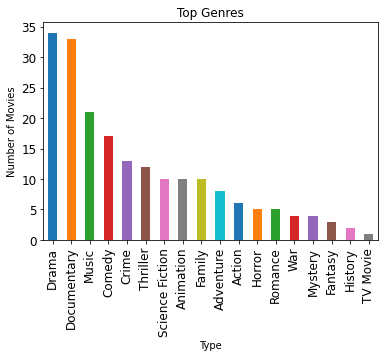

In [53]:
#for the color variety
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
# Initialize the plot
diagram = genres_count.plot.bar(fontsize = 12,color=colors)
# Set a title
plt.title('Top Genres')
# x-label and y-label
plt.xlabel('Type')
plt.ylabel('Number of Movies')
# Show the plot
plt.show();

As shown above, Drama is leading the way followed by Documentary and Music. Comedy and Crime in fourth and fifth place. History and TV Movie are the least two liked genres

Research Question 2.6 
Which are the most frequent actor involved?


First I will get the total count for every actor

In [54]:
actor_count = pd.Series(df100['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
actor_count.head(20)

Louis Tomlinson      3
David Tennant        3
Harry Styles         3
Niall Horan          3
Liam Payne           3
Bill Burr            3
Uma Thurman          2
Zayn Malik           2
Adrien Brody         2
Michael Caine        2
Frank John Hughes    2
Tom Hanks            2
Robert De Niro       2
Jack Nicholson       2
Louis C.K.           2
Scatman Crothers     2
Christian Bale       2
Edward Norton        2
Ralph Fiennes        2
Brad Pitt            2
dtype: int64

Visualizing the actors

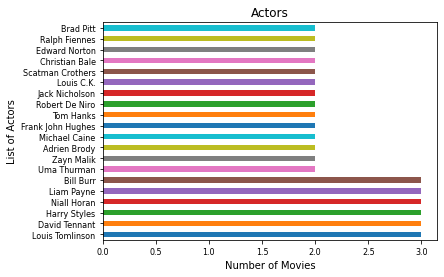

In [55]:
# Initialize the plot
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
diagram = actor_count.head(20).plot.barh(fontsize = 8,color=colors)
# Set a title
diagram.set(title = 'Actors')
# x-label and y-label
diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of Actors')
# Show the plot
plt.show()

In [56]:
actor_count.head(6)

Louis Tomlinson    3
David Tennant      3
Harry Styles       3
Niall Horan        3
Liam Payne         3
Bill Burr          3
dtype: int64

The top six actors are above, with each of them having 3 movies in the list.

Conclusions


Hence, the conclusion is, if we want to create movies which can be in the top 100 highest rated movies then
The average budget of the movies can be arround 14,185,571.58 Dollars

The average runtime of the movies can be arround 1 hour and 42 minutes and 41 seconds.

The Top 10 Genres we should focus on should be Drama, Documentary, Music, Comedy, Crime, Thriller, Animation, Science Fiction, Family and Adventure.

The Top 6 cast we should focus on should be : Louis Tomlinson Niall Horan, Liam Payne, Bill Burr, David Tennant and Harry Styles

The average revenue of the movies will be arround 81,859,012.63 Dollars

The limitations associated with the conclusions are:
We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.

 